### ***Goal of this notebook:***
#### The purpose of this notebook is to show the plotting functions implemented to investiate the richness-mass relations. It is designed to associate the halos in cosmoDC2 and the clusters detected by redMaPPer in cosmoDC2, but can be tuned to work with other catalogues. 

In [64]:
import GCRCatalogs

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM

from cluster_validation.opening_catalogs_functions import *
from cluster_validation.association_methods import *
from cluster_validation.plotting_functions import *
from cluster_validation.association_statistics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 6]
#plt.rcParams['figure.figsize'] = [10, 8] for big figures

In [72]:
plt.rcParams.update({'font.size': 18})

# 0 - opening catalogs

In [65]:
#function to open truth and detection catalogs

RM_cat_name = 'cosmoDC2_v1.1.4_redmapper_v0.2.1py'
DC2_cat_name = 'cosmoDC2_v1.1.4'          

min_richness = 20
min_halo_mass = 1e14 #Msun

cluster_data, member_data, truth_data, gc, gc_truth = RM_DC2_cat_open(RM_cat_name,DC2_cat_name,min_richness, min_halo_mass, cluster_only=False)

#take only the halo
halo_data = truth_data[truth_data['is_central']==True]

In [66]:
#define same cosmological parameters as in the truth catalog (cosmoDC2)
cosmo = gc_truth.cosmology

# 1 - associate redMaPPer detections to true DC2 halos

### - example association criteria : highest common membership within a cylinder with $\Delta_z=0.05, \theta_{max} = 1 Mpc$ 

In [67]:
#criteria
delta_zmax = 0.05
theta_max = 1. #Mpc
theta_max_type = "fixed_dist"
method = "membership"

match_num_1w, match_num_2w, ind_bij = \
volume_match(halo_data, cluster_data, delta_zmax, theta_max, theta_max_type, method, cosmo, truth_data, member_data)
#truth_to_det_match_numbers, det_to_truth_match_number, bijective_match_indices

In [68]:
#statistics
print ("number of bijective associations", number_of_associations(ind_bij))
print ("number and fraction of fragmentation", fragmentation(match_num_1w, ind_bij, method="bij"))
print ("number and fraction of overmerging", overmerging(match_num_2w, ind_bij, method="bij"))
print ("completeness", completeness(halo_data, ind_bij, gc, gc_truth))
print ("purity", purity(cluster_data, ind_bij,  gc, gc_truth))

number of bijective associations 3551
number and fraction of fragmentation (7, 0.0019712756969867645)
number and fraction of overmerging (150, 0.042241622078287806)
completeness 0.4399157582670904
purity 0.7447567114093959


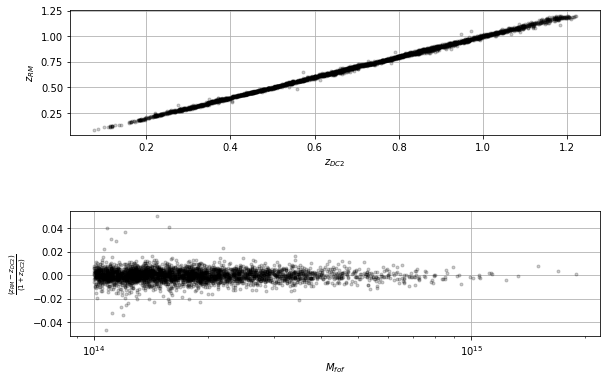

In [69]:
#sanity check plot
plot_redshift_comparison(halo_data, cluster_data, ind_bij)

# 2 - mass-richness relations

### - richness-mass relation for the entire matched sample

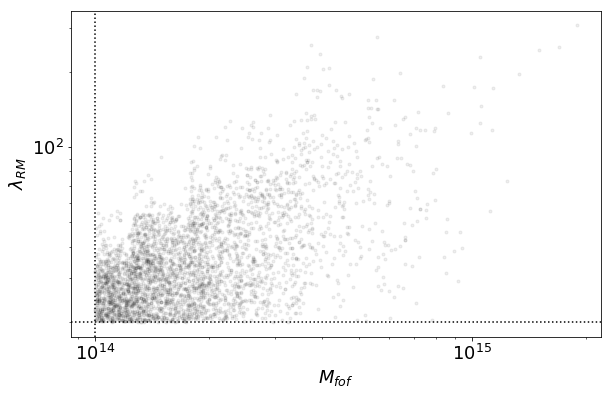

In [73]:
f, ax = plot_richness_mass(halo_data, cluster_data, ind_bij, min_richness=min_richness, min_halo_mass=min_halo_mass, fmt='b.')

### - richness-mass relation in different redshift bins

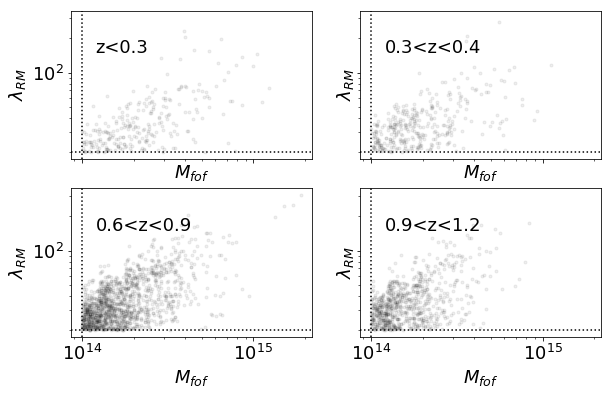

In [74]:
f, ax = plt.subplots(2,2, sharex=True, sharey=True)

plot_richness_mass(halo_data, cluster_data, ind_bij, zmin = 0.0, zmax = 0.3, min_richness=min_richness, min_halo_mass=min_halo_mass, fig =f, ax=ax[0,0])
plot_richness_mass(halo_data, cluster_data, ind_bij, zmin = 0.3, zmax = 0.4, min_richness=min_richness, min_halo_mass=min_halo_mass, fig =f, ax=ax[0,1])
plot_richness_mass(halo_data, cluster_data, ind_bij, zmin = 0.6, zmax = 0.9, min_richness=min_richness, min_halo_mass=min_halo_mass, fig =f, ax=ax[1,0])
plot_richness_mass(halo_data, cluster_data, ind_bij, zmin = 0.9, zmax = 1.2, min_richness=min_richness, min_halo_mass=min_halo_mass, fig =f, ax=ax[1,1])

label = ['z<0.3','0.3<z<0.4','0.6<z<0.9','0.9<z<1.2']

k = 0
for i in range(2):
    for j in range(2):
        ax[i,j].text(min_halo_mass * 1.2 , 150,label[k])
        k = k+1

### - mass-richness relation and example of comparison to litterature  
#### Adapted from https://github.com/LSSTDESC/DC2-analysis/blob/u/shenmingfu/cosmoDC2-cluster-mass-richness/contributed/cosmoDC2-cluster-mass-richness.ipynb

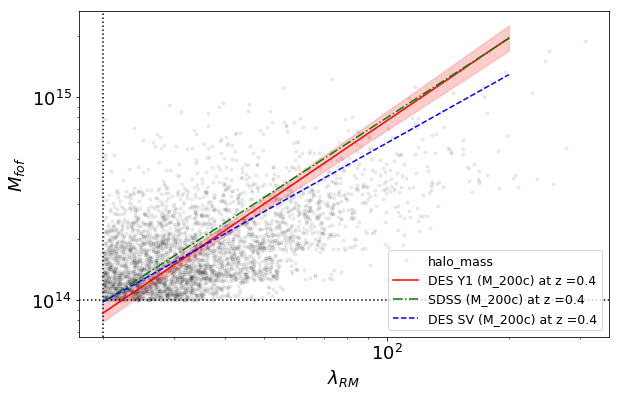

In [75]:
f, ax = plot_mass_richness(halo_data, cluster_data, ind_bij, zmin = 0., zmax=np.inf, min_richness=min_richness, min_halo_mass=min_halo_mass)

#adding parametrization from litterature
l = np.logspace(np.log10(min_richness), np.log10(200))

z0 = 0.4
Om_z0 = cosmo.Om0   

ax.fill_between(l, M_DES_Y1_lim(l, z0, 'min', Om_z0),M_DES_Y1_lim(l, z0, 'max', Om_z0),alpha=0.2,color='r')

ax.plot(l, M_DES_Y1(l, z0, Om_z0), 'r-', alpha=1, label='DES Y1 (M_200c) at z ='+str(z0) )
ax.plot(l, M_SDSS(l, z0, Om_z0), 'g-.', alpha=1, label='SDSS (M_200c) at z ='+str(z0))
ax.plot(l, M_DES_SV(l, z0, Om_z0), 'b--', alpha=1, label='DES SV (M_200c) at z ='+str(z0))

plt.legend(fontsize='x-small')